In [43]:
import numpy
from matplotlib import pyplot as plt
import pandas
from numpy import random as rnd
from scipy import linalg

rnd.seed(2012265)
from numpy import pi

1\. **PCA on 3D dataset**

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [44]:
# setup the dataset
N = 1600
x1 = rnd.randn(N)
x2 = x1 + 3 * rnd.randn(N)
x3 = 2 * x1 + x2
features = ['x1', 'x2', 'x3']
dataset = pandas.DataFrame(numpy.vstack((x1,x2,x3)).T, columns=features)

# eigenvalues and eigenvectors of the covariance matrix
cov = numpy.cov(dataset.values.T)
spect_cov, V_cov = linalg.eig(cov)
spect_cov = numpy.real_if_close(spect_cov)
V_cov = V_cov.T
sorting = numpy.argsort(spect_cov)   # getting the sorting indexes in ascendent order
spect_cov = spect_cov[sorting][::-1] # sorting the eigenvalues in descendent order
V_cov = V_cov[sorting][::-1]         # sorting the eigenvectors in descendent order

# eigenvalues and eigenvectors via SVD
U_SVD, spect_SVD, V_SVD = linalg.svd(dataset.values.T)
spect_SVD = numpy.real_if_close(spect_SVD**2 / (N-1))
U_SVD = U_SVD.T

# check if both methods return the same bases (regardless of the sign)
check = True
for i in range(V_cov.shape[0]):
    check = check and ( numpy.allclose(V_cov[i], U_SVD[i], 1e-2, 1e-10) or numpy.allclose(V_cov[i], -U_SVD[i], 1e-2, 1e-10) )
print(f"Check if the bases obtained are the same: {check}\n")

# work out the percentage of the dataset variability
percentage = spect_cov / cov.trace()
print(f"The percentage of variability is: {percentage}")

Check if the bases obtained are the same: True

The percentage of variability is: [9.30662621e-01 6.93373789e-02 4.62285397e-17]


Given that the dataset is constructed so that the third feature is obtained from a linear combination of the previous two, it's natural that it's variability is due only to the variability of the first two, in fact we find an almost-0 value for it.

We must keep the other two dimensions if we want to describe at least the $99\%$ of the variability of the dataset.

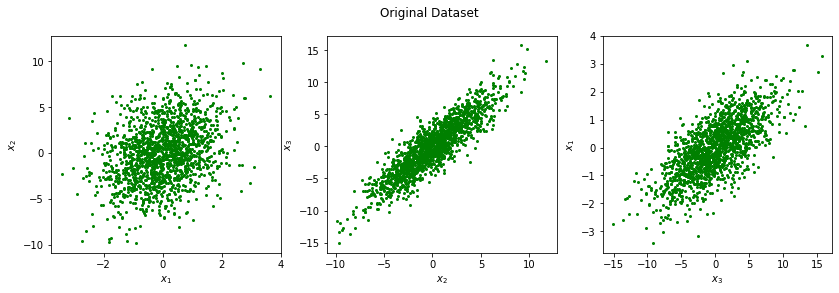

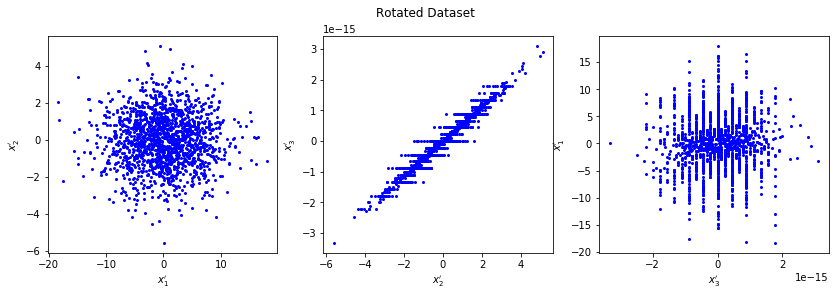

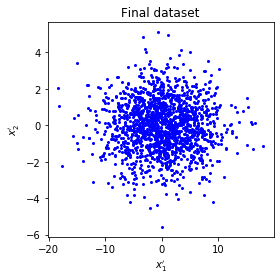

In [45]:
# rotating the coordinate system obtaining the new dataset
new_features = ['x1\'','x2\'','x3\'']
dataset_new = pandas.DataFrame((V_cov @ dataset.values.T).T, columns=new_features)

# plot all 3 dimensions of the old and new datasets
data = [dataset, dataset_new]
colours = ['g', 'b']
labels = [ ["$x_1$", "$x_2$", "$x_3$"], ["$x_1'$", "$x_2'$", "$x_3'$"] ]

fig, axs = plt.subplots(1, 3, figsize=(14,4))
for j in range(3):
    data[0].plot(x=features[j], y=features[(j+1)%3], ax=axs[j], linestyle='', marker='.', markersize=4, color=colours[0], legend=False, xlabel=labels[0][j], ylabel=labels[0][(j+1)%3])
fig.suptitle("Original Dataset")

fig, axs = plt.subplots(1, 3, figsize=(14,4))
for j in range(3):
    data[1].plot(x=new_features[j], y=new_features[(j+1)%3], ax=axs[j], linestyle='', marker='.', markersize=4, color=colours[1], legend=False, xlabel=labels[1][j], ylabel=labels[1][(j+1)%3])
fig.suptitle("Rotated Dataset")

# we now reduce the dimensionality of the problem, in order to keep the 99% of the variability
to_drop = numpy.array(new_features)[percentage < 1e-02]
dataset_new = dataset_new.drop(columns=to_drop)
fig, ax = plt.subplots(1, figsize=(4,4))
dataset_new.plot(x='x1\'', y='x2\'', linestyle='', marker='.', markersize=4, color='b', legend=False, xlabel=labels[1][0], ylabel=labels[1][1], ax=ax)
ax.set_title("Final dataset")
fig.tight_layout()

2\. **PCA on a nD dataset**

Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normal distributed, with standar deviation much smaller (say, a factor 50) than those used to generate the $x_1$ and $x_2$.

Repeat the PCA procedure and compare the results with what you obtained before

The percentage of variability is: [9.30535955e-01 6.93280613e-02 1.55333909e-05 1.47075037e-05
 1.46578746e-05 1.40442502e-05 1.36377642e-05 1.34129939e-05
 1.29053710e-05 1.26956977e-05 1.23295886e-05 1.20592713e-05]


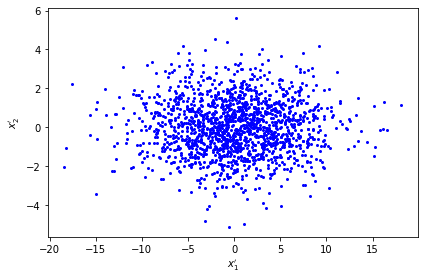

In [47]:
# starting from the previous dataset, we build up a new one with 10 dimensions of random noise
features = ["x"+str(i) for i in range(1,13)]
mu_noise, sigma_noise = 0, 1/50
noise_values = numpy.array([mu_noise + sigma_noise * rnd.randn(N) for i in range(10)]).T

dataset = pandas.DataFrame(numpy.hstack((dataset_new.values, noise_values)), columns=features)

# eigenvalues and eigenvectors of the covariance matrix
cov = numpy.cov(dataset.values.T)
spect, V = linalg.eig(cov)
eigenval = numpy.real_if_close(spect)
eigenvec = V.T

# sorting the eigenvalues and eigenvectors in descendent order
sorting = numpy.argsort(eigenval)
eigenval = eigenval[sorting][::-1]
eigenvec = eigenvec[sorting][::-1]

# work out the percentage of the dataset variability
percentage = eigenval / cov.trace()
print(f"The percentage of variability is: {percentage}")

# determine the survived dimensions
survived = eigenval / cov.trace() > 0.01
base = eigenvec[survived]

# getting the new reduced dataset
reduced_dataset = (base @ dataset.values.T).T
new_features = ['x'+str(i)+'\'' for i in range(1,reduced_dataset.shape[1]+1)]
reduced_dataset = pandas.DataFrame(reduced_dataset, columns=new_features)

# plot the dataset
fig, ax = plt.subplots(1)
reduced_dataset.plot(x='x1\'', y='x2\'', linestyle='', marker='.', markersize=4, color='b', legend=False, xlabel="$x_1'$", ylabel="$x_2'$", ax=ax)
fig.tight_layout()

In the previous exercise we kept two dimensions to describe the $99\%$ of the variability. In this case, the percetage of variability represented by those dimensions has slightly decreased because we added adding many dimensions of noise. Since the variability of the noise dimensions is much smaller than the one of the first two dimensions, it's presence didn't affect at all our PCA run with a tolerance of $99\%$ of variability. In fact we now get the same exact result (unless for a minus sign) as before.

3 \. **Looking at an oscillating spring** (optional)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [70]:
# defining a function to operate the PCA using the covariant matrix
### the dataset array passed should be ready to be processed
### the threshold is the percentage amount of variability that is required to be kept during the PCA
### the function returns the dataset modified after the PCA and the variability percentage of each coordinate
def PCA_cov(dataset_arr, threshold = 0):
    cov = numpy.cov(dataset_arr)
    l, V = linalg.eig(cov)
    eigval = numpy.real_if_close(l)
    eigvec = V.T
    sorting = numpy.argsort(eigval)
    eigval = eigval[sorting][::-1]
    eigvec = eigvec[sorting][::-1]
    survived = eigval / cov.trace() > threshold
    new_base = eigvec[survived]
    variability = eigval[survived] / cov.trace()
    new_dataset = new_base @ dataset_arr
    return new_dataset, variability

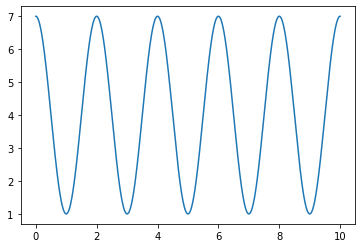

In [71]:
# defining a function to operate the PCA using the covariant matrix
### the dataset array passed should be ready to be processed
### the threshold is the percentage amount of variability that is required to be kept during the PCA
### the function returns the dataset modified after the PCA and the variability percentage of each coordinate
def PCA_cov(dataset_arr, threshold = 0):
    cov = numpy.cov(dataset_arr)
    l, V = linalg.eig(cov)
    eigval = numpy.real_if_close(l)
    eigvec = V.T
    sorting = numpy.argsort(eigval)
    eigval = eigval[sorting][::-1]
    eigvec = eigvec[sorting][::-1]
    survived = eigval / cov.trace() > threshold
    new_base = eigvec[survived]
    variability = eigval[survived] / cov.trace()
    new_dataset = new_base @ dataset_arr
    return new_dataset, variability

# setting the parameters for the oscillator
period = 2
rest_x_pos = 4
amplitude = 3

# setting the measurements
N = 1600
time_records = numpy.linspace(0, 10, N)
x_records = rest_x_pos + amplitude * numpy.cos(2 * pi / period * time_records)

# setting the noise
y_records = 0.1 * rnd.randn(N)

# including the third spacial dimension
z_records = numpy.zeros(N)

# positions dataset
pos_records = numpy.vstack((x_records, y_records, z_records))

# PCA on the original dataset
new_pos, _ = PCA_cov(pos_records, 0.00005)

# setting the parameters for the n cameras
n = 7
angles_cameras = numpy.vstack((rnd.uniform(0, pi, n), rnd.uniform(0, 2*pi, n))).T
plt.plot(time_records, new_pos[0])

4\. **PCA on the MAGIC dataset** (optional)

Perform a PCA on the magic04.data dataset

In [6]:
# get the dataset and its description on the proper data directory
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P ./data/
#!wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P ./data/
#!rm -r ./data/